# 5주차 과제 - 모델링2 

#### 2022110484 장윤서

## 1. 모델 선정 : 예측 성능이 좋은 모델 
#### 분석 이유 : 따릉이 대여량 예측하기 위해서 
#### 모델 선정
#### - 의사결정 나무
#### - 랜덤포레스트 
#### - XGB 
## 2. 모델 학습 
## 3. 하이퍼파라미터 튜닝 
## 4. 최종모델 선정 
## 5. 성능확인 
## 6. 예측하기 

# 라이브러리 불러오기 

In [1]:
#라이브러리 임포트하기 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%config InlineBackend.figure_format = 'retina'  #선명하게 만들기

# 결측치 확인하는 라이브러리
import missingno as msno 

# 다중대체 라이브러리
from fancyimpute import IterativeImputer

# Warning 메세지를 뜨지 않게 해줌
import warnings
warnings.filterwarnings('ignore')

import os
%config InlineBackend.figure_format = 'retina'  #plot내 글씨를 선명하게 해주는 옵션


from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

In [2]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,classification_report,
    mean_squared_error
)

In [3]:
# Decision Tree 
from sklearn.tree import DecisionTreeRegressor, plot_tree

# 모델 튜닝하기 
from sklearn.model_selection import GridSearchCV

In [4]:
from sklearn.ensemble import RandomForestRegressor

# 데이터 불러오기

In [5]:
train= pd.read_csv('Bike_clean2.csv')
test=pd.read_csv('C:/Users/jys72/비어플/bike_test.csv',encoding='ISO-8859-1')

In [6]:
#원본 데이터 손실 방지를 위한 copy 본 만들기 
train2=train.copy()
df=test.copy()

In [7]:
train2.head()

,Date,Rented Bike Count,Hour,Temperature(ì§¸C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(ì§¸C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,Day_of_Week
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,3,1,1,12,0
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,3,1,1,12,0
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,3,1,1,12,0
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,3,1,1,12,0
4,2017-12-01,78,4,-6.0,36,1.6,2000,-18.6,0.0,0.0,0.0,3,1,1,12,0


<Axes: xlabel='Rented Bike Count', ylabel='Count'>

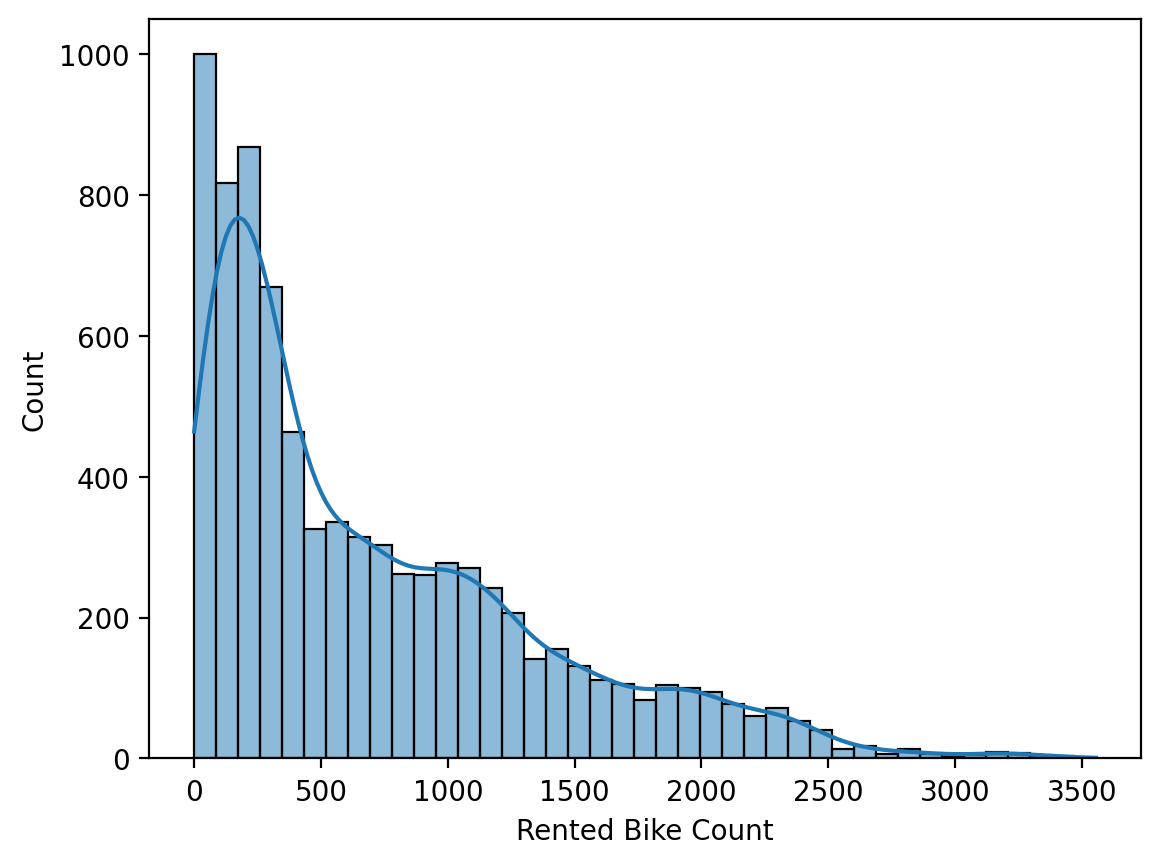

In [8]:
#train 의 타겟 변수의 히스토그램 판단하기 
sns.histplot(train2['Rented Bike Count'],kde=True)

#### Target 변수의 분포를 가정하기 어렵기에 비모수적인 방법을 사용

In [9]:
df.head()

,Date,Hour,Temperature(ì§¸C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(ì§¸C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/11/2018,0,5.7,62,2.3,1909,-1.0,0.0,0.0,0.0,Autumn,No Holiday,Yes
1,01/11/2018,1,5.1,65,1.6,1932,-0.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
2,01/11/2018,2,4.4,64,NaN,2000,-1.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
3,01/11/2018,3,4.2,65,0.7,1962,-1.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
4,01/11/2018,4,3.6,70,0.8,1934,-1.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


# Test 데이터의 전처리 수행 
#### 앞서 train에 적용했던 전처리를 test에 같이 적용한다

# 1차 전처리 수행하기 

### 변수변환 

In [10]:
#날짜변수 변환하기 
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
# 범주형 변수 변환하기 
df['Seasons']=df['Seasons'].astype('category')
df['Holiday']=df['Holiday'].astype('category')
df['Functioning Day']=df['Functioning Day'].astype('category')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date                         720 non-null    datetime64[ns]
 1   Hour                         720 non-null    int64         
 2   Temperature(ì§¸C)            644 non-null    float64       
 3   Humidity(%)                  720 non-null    int64         
 4   Wind speed (m/s)             646 non-null    float64       
 5   Visibility (10m)             720 non-null    int64         
 6   Dew point temperature(ì§¸C)  720 non-null    float64       
 7   Solar Radiation (MJ/m2)      720 non-null    float64       
 8   Rainfall(mm)                 720 non-null    float64       
 9   Snowfall (cm)                720 non-null    float64       
 10  Seasons                      646 non-null    category      
 11  Holiday                      720 non-null    

### 파생변수 

In [12]:
#날짜 변수에서 월 변수 추출하기 
df['month']=df['Date'].dt.month

#날짜 변수에서 요일 변수 추출하기 
df['Day_of_Week'] = df['Date'].dt.day_name()

#요일 변수 범주형 처리하기 
df['Day_of_Week']=df['Day_of_Week'].astype('category')

### 결측값 처리하기 

In [13]:
# 대체 -다중대체법: 온도변수 
df._get_numeric_data().corr()['Temperature(ì§¸C)'].sort_values()

Snowfall (cm)                 -0.227743
Visibility (10m)              -0.219159
Humidity(%)                   -0.065207
Rainfall(mm)                   0.040204
Wind speed (m/s)               0.264282
Hour                           0.345812
Solar Radiation (MJ/m2)        0.487277
Dew point temperature(ì§¸C)    0.573377
Temperature(ì§¸C)              1.000000
month                               NaN
Name: Temperature(ì§¸C), dtype: float64

In [14]:
imputer = IterativeImputer()
imputed_arr=imputer.fit_transform(df[['Dew point temperature(ì§¸C)', 'Solar Radiation (MJ/m2)', 'month', 'Temperature(ì§¸C)']])
df['Temperature(ì§¸C)']=pd.DataFrame(imputed_arr, columns=['Dew point temperature(ì§¸C)', 'Solar Radiation (MJ/m2)', 'month', 'Temperature(ì§¸C)'])['Temperature(ì§¸C)'].round(1)

In [15]:
df._get_numeric_data().corr()['Wind speed (m/s)'].sort_values()

Humidity(%)                   -0.275908
Dew point temperature(ì§¸C)   -0.089265
Snowfall (cm)                  0.033447
Rainfall(mm)                   0.141818
Visibility (10m)               0.169631
Temperature(ì§¸C)              0.240908
Solar Radiation (MJ/m2)        0.257352
Hour                           0.265360
Wind speed (m/s)               1.000000
month                               NaN
Name: Wind speed (m/s), dtype: float64

In [16]:
#대체-다중대체 : 풍속변수
imputer = IterativeImputer()
imputed_arr=imputer.fit_transform(df[['Humidity(%)', 'Solar Radiation (MJ/m2)', 'Hour', 'Wind speed (m/s)']])
df['Wind speed (m/s)']=pd.DataFrame(imputed_arr, columns=['Humidity(%)', 'Solar Radiation (MJ/m2)', 'Hour', 'Wind speed (m/s)'])['Wind speed (m/s)'].round(1)

In [17]:
#대체-월별 변수로 대체하기: 계절변수 
#월 변수에서 봄 여름 가을 겨울에 해당하는 달을 찾기 
print(f"겨울:{df[df['Seasons']=='Winter']['Date'].dt.month.unique()}")
print(f"봄:{df[df['Seasons']=='Spring']['Date'].dt.month.unique()}")
print(f"여름:{df[df['Seasons']=='Summer']['Date'].dt.month.unique()}")
print(f"가을:{df[df['Seasons']=='Autumn']['Date'].dt.month.unique()}")

겨울:[]
봄:[]
여름:[]
가을:[11]


In [18]:
# 계절 결측치를 월로 대체
df['Seasons'] = df['Seasons'].fillna(df['month'].map({1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring', 6: 'Summer', 7: 'Summer', 8: 'Summer', 9: 'Autumn', 10: 'Autumn', 11:'Autumn',12: 'Winter'}))


In [19]:
df.isna().sum()

Date                           0
Hour                           0
Temperature(ì§¸C)              0
Humidity(%)                    0
Wind speed (m/s)               0
Visibility (10m)               0
Dew point temperature(ì§¸C)    0
Solar Radiation (MJ/m2)        0
Rainfall(mm)                   0
Snowfall (cm)                  0
Seasons                        0
Holiday                        0
Functioning Day                0
month                          0
Day_of_Week                    0
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date                         720 non-null    datetime64[ns]
 1   Hour                         720 non-null    int64         
 2   Temperature(ì§¸C)            720 non-null    float64       
 3   Humidity(%)                  720 non-null    int64         
 4   Wind speed (m/s)             720 non-null    float64       
 5   Visibility (10m)             720 non-null    int64         
 6   Dew point temperature(ì§¸C)  720 non-null    float64       
 7   Solar Radiation (MJ/m2)      720 non-null    float64       
 8   Rainfall(mm)                 720 non-null    float64       
 9   Snowfall (cm)                720 non-null    float64       
 10  Seasons                      720 non-null    category      
 11  Holiday                      720 non-null    

# 2차 전처리 수행하기 

### 범주형 변수 처리하기 

In [21]:
# 'category' 타입의 열 선택
categorical_cols = df.select_dtypes(include=['category']).columns.tolist()

# 라벨 인코더 객체 생성 및 적용
label_encoder = LabelEncoder()
for col in categorical_cols:
   
    df[col] = label_encoder.fit_transform(df[col])

# 결과 확인
print(df[categorical_cols])

     Seasons  Holiday  Functioning Day  Day_of_Week
0          0        0                1            4
1          0        0                1            4
2          0        0                1            4
3          0        0                1            4
4          0        0                1            4
..       ...      ...              ...          ...
715        0        0                1            0
716        0        0                1            0
717        0        0                1            0
718        0        0                1            0
719        0        0                1            0

[720 rows x 4 columns]


In [22]:
df.head()

,Date,Hour,Temperature(ì§¸C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(ì§¸C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,Day_of_Week
0,2018-11-01,0,5.7,62,2.3,1909,-1.0,0.0,0.0,0.0,0,0,1,11,4
1,2018-11-01,1,5.1,65,1.6,1932,-0.9,0.0,0.0,0.0,0,0,1,11,4
2,2018-11-01,2,4.4,64,1.0,2000,-1.8,0.0,0.0,0.0,0,0,1,11,4
3,2018-11-01,3,4.2,65,0.7,1962,-1.8,0.0,0.0,0.0,0,0,1,11,4
4,2018-11-01,4,3.6,70,0.8,1934,-1.3,0.0,0.0,0.0,0,0,1,11,4


In [23]:
# 전처리 완료한 데이터 분리하기 
test=df.copy()

# 최종 변수 선택하기 

#### Date 변수의 경우 월과 요일을 따로 변수를 만들어서 빼줬으므로 필요없다고 생각하여 제거하였다 

In [24]:
test_last=test.drop('Date', axis=1)
train_last=train2.drop('Date',axis=1)

# Train, Valid 분리하기 

In [25]:
#X(독립변수), y(종속변수) 분리
X = train_last.drop("Rented Bike Count", axis=1)
y = train_last["Rented Bike Count"]

In [26]:
#train과 valid 셋 분리

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(6432, 14) (1608, 14) (6432,) (1608,)


In [27]:
# train, valid , test 차원 확인하기 
print(f'Train:{X_train.shape}\nValid:{X_val.shape}\nTest:{test.shape}')

Train:(6432, 14)
Valid:(1608, 14)
Test:(720, 15)


# 모델 학습하기 

# 1. Decision Tree 

### : 의사결정 규칙에 따라 출력값을 예측하는 모형
	예측력은 다른 지도학습에 비해 떨어지나 해석이 수월하다. 특히 시각화를 할 수 있다는 장점이 있다

	앙상블 모형의 기저 모형이 된다( base learner) 

#### 회귀 나무 모형

1) 모든 독립변수들 중에서 가장 높은 정보획득을 만드는 독립변수 찾기 

2) 더 이상 일정의 정보획득이 없을 때까지 트리를 만든다 



### 모델 선언

In [28]:
#모델 선언하기 
DT= DecisionTreeRegressor(random_state=42)

# 해당 모델의 파라미터 확인하기 
print(DT.get_params()) 

{'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}


### 모델 학습 

In [29]:
#모델에 적합시키기 
DT.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

In [30]:
#y의 예측 값 구하기 
y_pred=DT.predict(X_val)

### 모델 평가

In [31]:
#모델 평가 라이브러리 
from sklearn.metrics import mean_absolute_error, mean_squared_error

#모델 평가하기 
print("R^2:",DT.score(X_train, y_train))
print("R^2:",DT.score(X_val, y_val))

pred = DT.predict(X_val)

mae = mean_absolute_error(y_val, pred)
mse = mean_squared_error(y_val, pred)
rmse = np.sqrt(mean_squared_error(y_val, pred))
print("MSE: %f" % (mse))
print("RMSE: %f" % (rmse))
print("MAE: %f" % (mae))

R^2: 1.0
R^2: 0.8321268999800173
MSE: 70668.985075
RMSE: 265.836388
MAE: 151.058458


#### 과적합이 된 거 같아서 하이퍼 파라미터 튜닝을 진행하였다 

### 하이퍼 파리미터 튜닝하기 

In [32]:
#테스트하려고하는 파라미터 값들 정의하기 
parameters = {'max_depth': [3, 5, 7, 9],
              'min_samples_split': [x for x in range(3,15,2)],
              'min_samples_leaf': [x for x in range(1,15,2)],
              'max_features': ['auto', 'sqrt', 'log2'],
              'splitter': ['best', 'random']}

# 그리드 서치 
grid_dt = GridSearchCV(DT, # estimator 객체,
                      param_grid = parameters, cv = 5,
                      n_jobs = -1 )

 
grid_dt.fit(X_train, y_train)

result = pd.DataFrame(grid_dt.cv_results_['params'])
result['mean_test_score'] = grid_dt.cv_results_['mean_test_score']
result.sort_values(by='mean_test_score', ascending=False)

,max_depth,max_features,min_samples_leaf,min_samples_split,splitter,mean_test_score
790,9,auto,5,13,best,0.818700
778,9,auto,3,13,best,0.818586
788,9,auto,5,11,best,0.817653
776,9,auto,3,11,best,0.817474
794,9,auto,7,5,best,0.817469
...,...,...,...,...,...,...
423,5,log2,1,5,random,0.321520
341,5,sqrt,1,7,random,0.317832
425,5,log2,1,7,random,0.317832
337,5,sqrt,1,3,random,0.298646


In [33]:
# 최적의 하이퍼 파라미터로 모델 학습
DT_1=DecisionTreeRegressor(max_depth=9, max_features='auto',min_samples_leaf=5,min_samples_split=13,splitter='best',random_state=42)
DT_1.fit(X_train, y_train)

#예측하기 
y_pred1=DT_1.predict(X_val)

# 성능확인하기 
print("R^2:",DT_1.score(X_train, y_train))
print("R^2:",DT_1.score(X_val, y_val))

pred = DT_1.predict(X_val)

mae = mean_absolute_error(y_val, pred)
mse = mean_squared_error(y_val, pred)
rmse = np.sqrt(mean_squared_error(y_val, pred))
print("MSE: %f" % (mse))
print("RMSE: %f" % (rmse))
print("MAE: %f" % (mae))

R^2: 0.8724230960148222
R^2: 0.8442223292078335
MSE: 65577.212137
RMSE: 256.080480
MAE: 161.938762


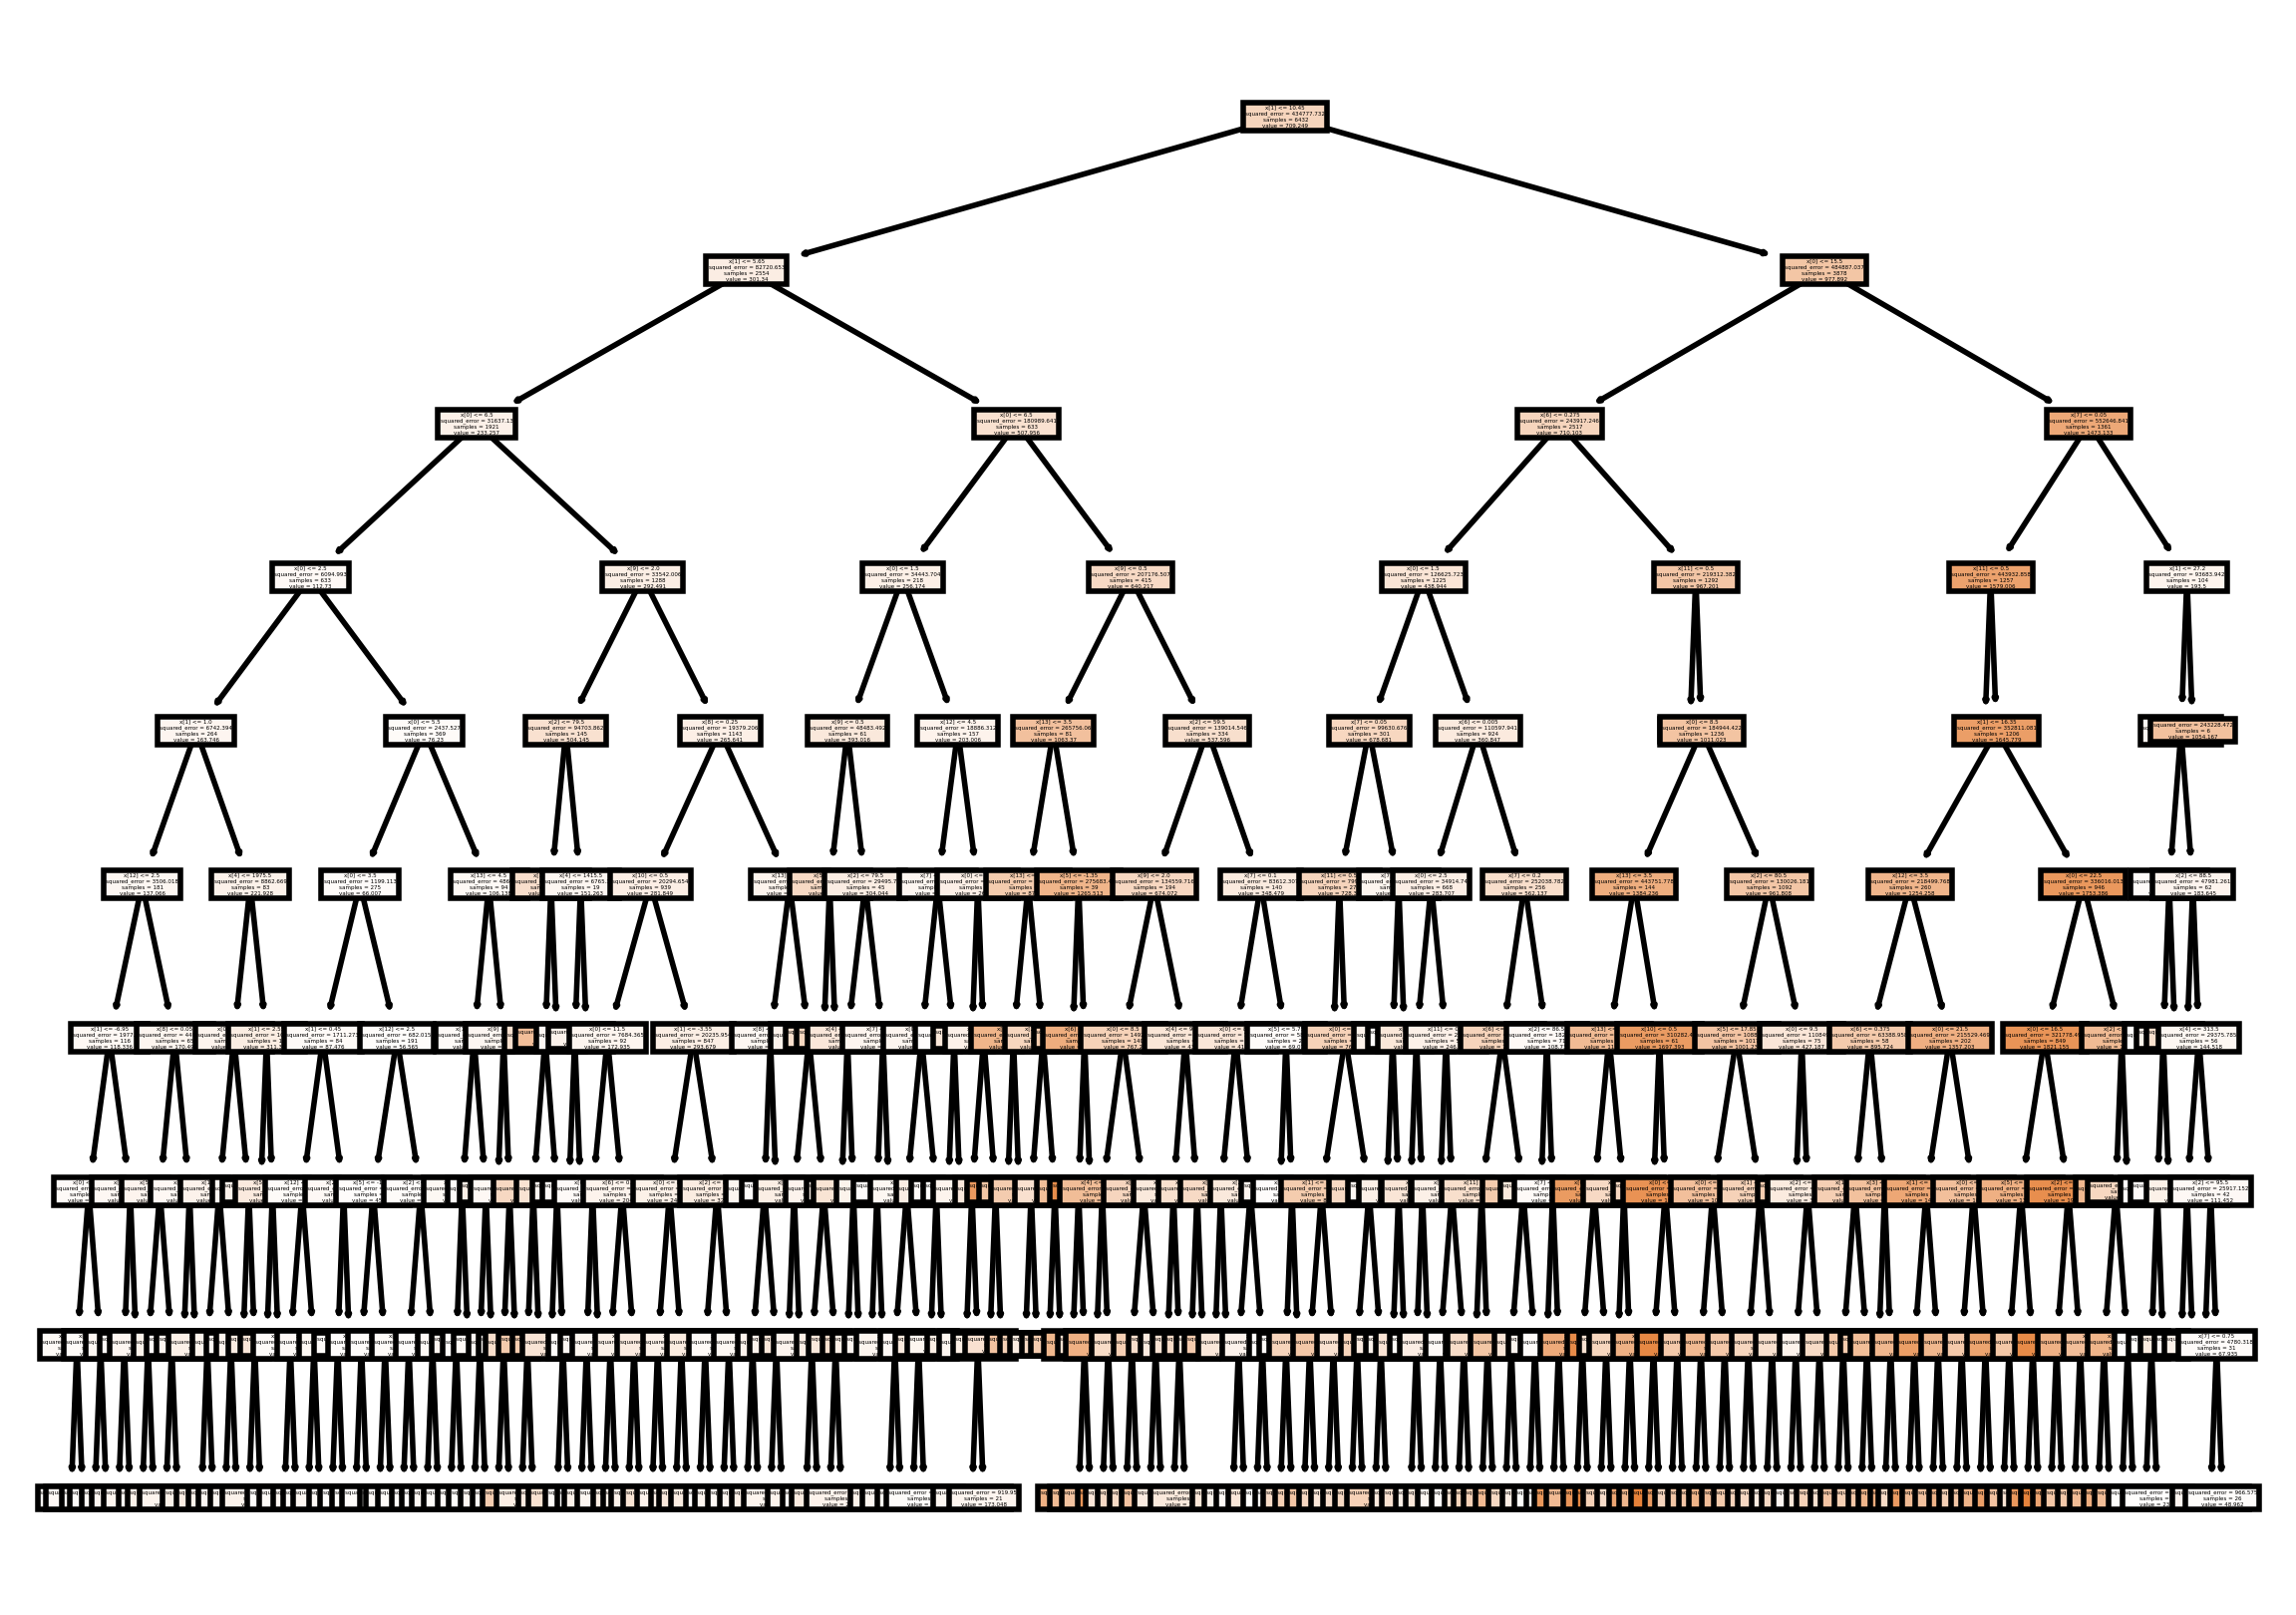

In [34]:
#시각화 하기 
plt.figure(figsize=(7,5), dpi=200)
plot_tree(DT_1, filled=True)
plt.show()

### 변수 중요도 

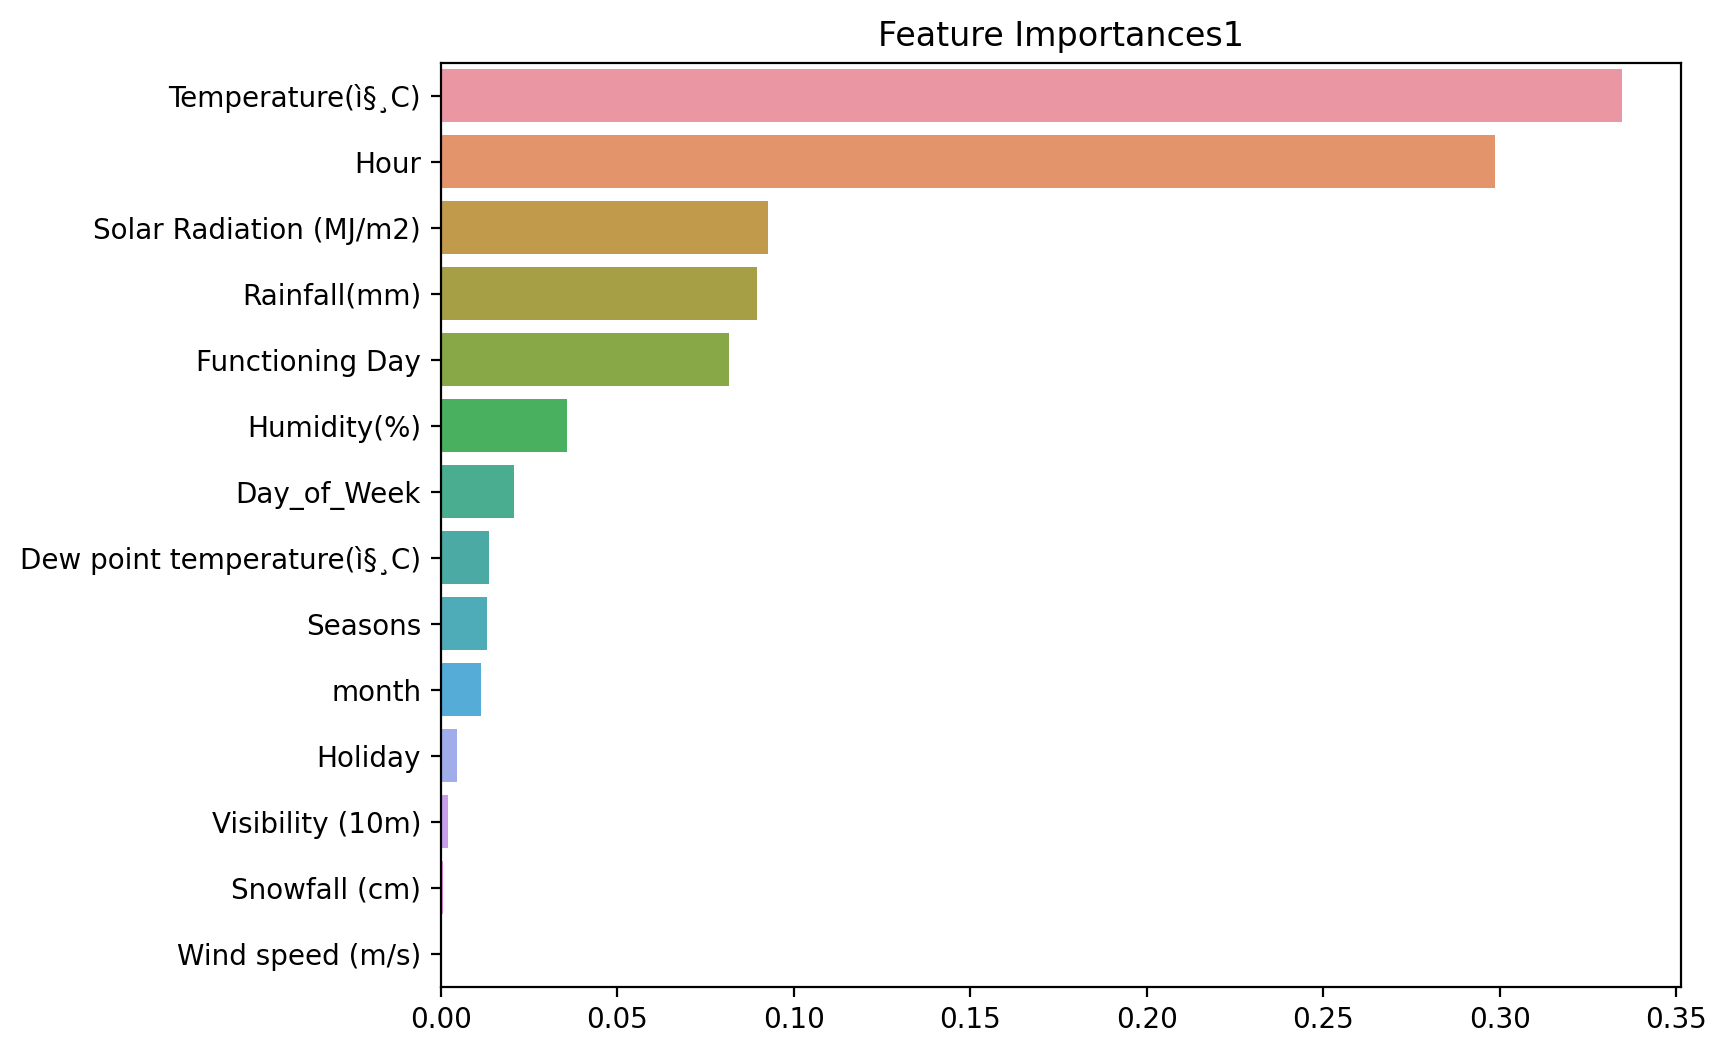

In [35]:
# 변수 중요도 계산

importances_values_1 = pd.Series(DT_1.feature_importances_, index=X_val.columns).sort_values(ascending=False)

# 변수 중요도 시각화

plt.figure(figsize=(8,6))
plt.title('Feature Importances1')
sns.barplot(x=importances_values_1, y=importances_values_1.index)
plt.show()

#### 변수 중요도를 구해본 후에 중요한 변수만 선택하여서 다시 모델 돌리기

### 변수 선택하기 

In [36]:
# 최적의 하이퍼 파라미터 구함 
X_train1=X_train[['Hour','Temperature(ì§¸C)','Solar Radiation (MJ/m2)','Rainfall(mm)','Functioning Day']]
X_val1=X_val[['Hour','Temperature(ì§¸C)','Solar Radiation (MJ/m2)','Rainfall(mm)','Functioning Day']]
DT_2=DecisionTreeRegressor(max_depth=9, max_features='auto',min_samples_leaf=5,min_samples_split=13,splitter='best',random_state=42)
DT_2.fit(X_train1, y_train)


#예측하기 
y_pred1=DT_2.predict(X_val1)

# 성능확인하기 
print("R^2:",DT_2.score(X_train1, y_train))
print("R^2:",DT_2.score(X_val1, y_val))

pred = DT_2.predict(X_val1)

mae = mean_absolute_error(y_val, pred)
mse = mean_squared_error(y_val, pred)
rmse = np.sqrt(mean_squared_error(y_val, pred))
print("MSE: %f" % (mse))
print("RMSE: %f" % (rmse))
print("MAE: %f" % (mae))

R^2: 0.8398389079306248
R^2: 0.7927798010253001
MSE: 87232.803509
RMSE: 295.351999
MAE: 185.161884


####  train과 val의 r^2 를 비교해보았을 때 두번째 모델이 가장 적합하다 

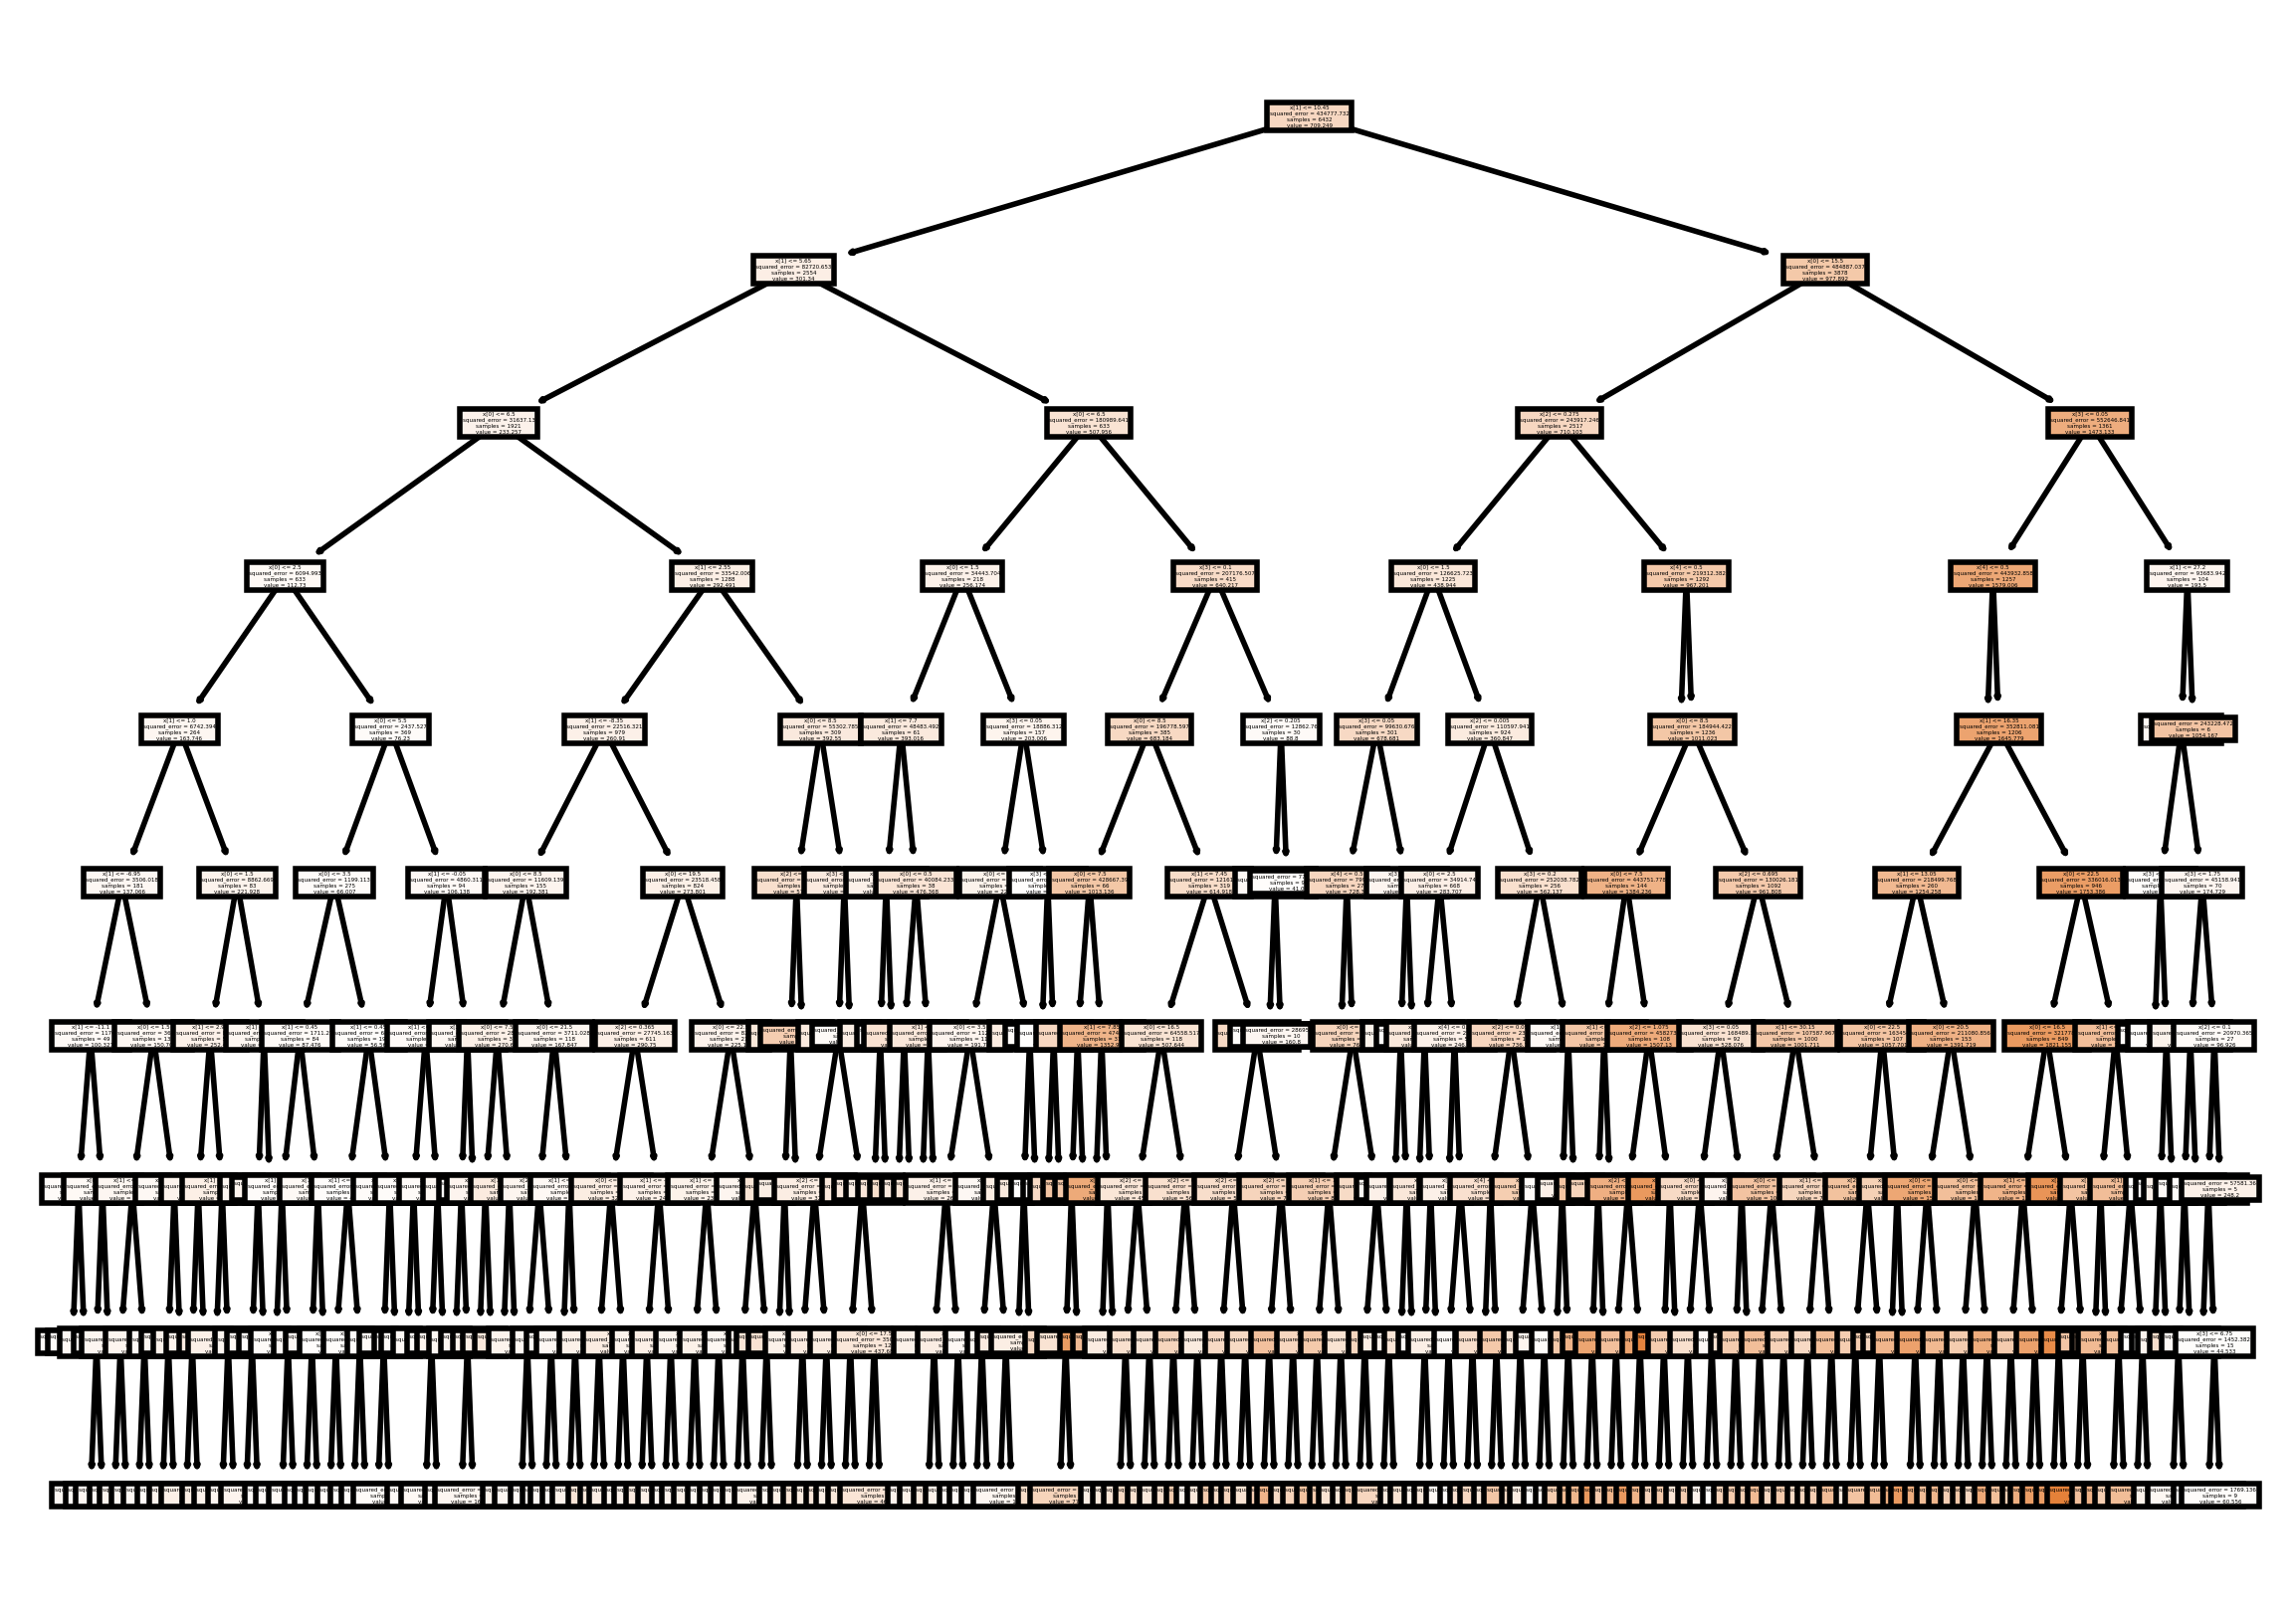

In [37]:
plt.figure(figsize=(7,5), dpi=200)
plot_tree(DT_2, filled=True)
plt.show()

## 2. Random Forest 

### 모델 선언

In [38]:
RF=RandomForestRegressor(random_state=42)

In [39]:
#하이퍼파라미터 확인하기 
print(RF.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


### 모델 학습

In [40]:
RF.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

### 모델 평가

In [41]:
#모델 평가 라이브러리 
from sklearn.metrics import mean_absolute_error, mean_squared_error

#모델 평가하기 
print("R^2:",RF.score(X_train, y_train))
print("R^2:",RF.score(X_val, y_val))

pred = RF.predict(X_val)

mae = mean_absolute_error(y_val, pred)
mse = mean_squared_error(y_val, pred)
rmse = np.sqrt(mean_squared_error(y_val, pred))
print("MSE: %f" % (mse))
print("RMSE: %f" % (rmse))
print("MAE: %f" % (mae))

R^2: 0.9882089274394876
R^2: 0.9123511213862368
MSE: 36897.259262
RMSE: 192.086593
MAE: 115.667052


## 3. XGB

In [42]:
from xgboost import XGBRegressor

In [43]:
XGB=XGBRegressor(random_state=42)

In [44]:
XGB.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [45]:
#모델 평가 라이브러리 
from sklearn.metrics import mean_absolute_error, mean_squared_error

#모델 평가하기 
print("R^2:",RF.score(X_train, y_train))
print("R^2:",RF.score(X_val, y_val))

pred = XGB.predict(X_val)

mae = mean_absolute_error(y_val, pred)
mse = mean_squared_error(y_val, pred)
rmse = np.sqrt(mean_squared_error(y_val, pred))
print("MSE: %f" % (mse))
print("RMSE: %f" % (rmse))
print("MAE: %f" % (mae))

R^2: 0.9882089274394876
R^2: 0.9123511213862368
MSE: 30955.261838
RMSE: 175.941075
MAE: 105.925120


## 최종 모델 선정 

#### train과 val 의 R^2 값, 그리고 RMSE와 MAE를 비교해보았을 때 XGB 모델이 가장 예측을 잘하는 것을 알 수 있다 
##### 따라서 XGB 모델의 성능을 개선 시키기 위해 하이퍼파라미터 튜닝을 진행한다

In [46]:
# 하이퍼파라미터 튜닝 

#테스트하려고하는 파라미터 값들 정의하기

parameters = {'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0] }

# 그리드 서치 
grid_search = GridSearchCV(estimator=XGB, param_grid=parameters, scoring='neg_mean_squared_error', cv=5, n_jobs = -1)
grid_search.fit(X_train, y_train)

 

result = pd.DataFrame(grid_search.cv_results_['params'])
result['mean_test_score'] = grid_search.cv_results_['mean_test_score']
result.sort_values(by='mean_test_score', ascending=False)

,colsample_bytree,learning_rate,max_depth,n_estimators,subsample,mean_test_score
160,0.9,0.20,5,200,0.9,-30101.152590
80,0.8,0.20,5,200,1.0,-30392.302118
79,0.8,0.20,5,200,0.9,-30750.574303
241,1.0,0.20,5,200,0.9,-30790.610494
159,0.9,0.20,5,200,0.8,-31042.801103
...,...,...,...,...,...,...
81,0.9,0.01,3,50,0.8,-270526.954317
83,0.9,0.01,3,50,1.0,-270999.605498
1,0.8,0.01,3,50,0.9,-271956.971761
0,0.8,0.01,3,50,0.8,-272159.771113


In [47]:
# 최적의 하이퍼 파라미터로 모델 학습
XGB_1=XGBRegressor(random_state=42, colsample_bytree=0.9,learning_rate=0.2,max_depth=5,n_estimators=200,subsample=0.9)
XGB_1.fit(X_train, y_train)

#예측하기 
y_pred1=XGB_1.predict(X_val)

# 성능확인하기 
print("R^2:",XGB_1.score(X_train, y_train))
print("R^2:",XGB_1.score(X_val, y_val))

pred = XGB_1.predict(X_val)

mae = mean_absolute_error(y_val, pred)
mse = mean_squared_error(y_val, pred)
rmse = np.sqrt(mean_squared_error(y_val, pred))
print("MSE: %f" % (mse))
print("RMSE: %f" % (rmse))
print("MAE: %f" % (mae))

R^2: 0.9835779581822471
R^2: 0.9256132356318717
MSE: 31314.350782
RMSE: 176.958613
MAE: 110.596280


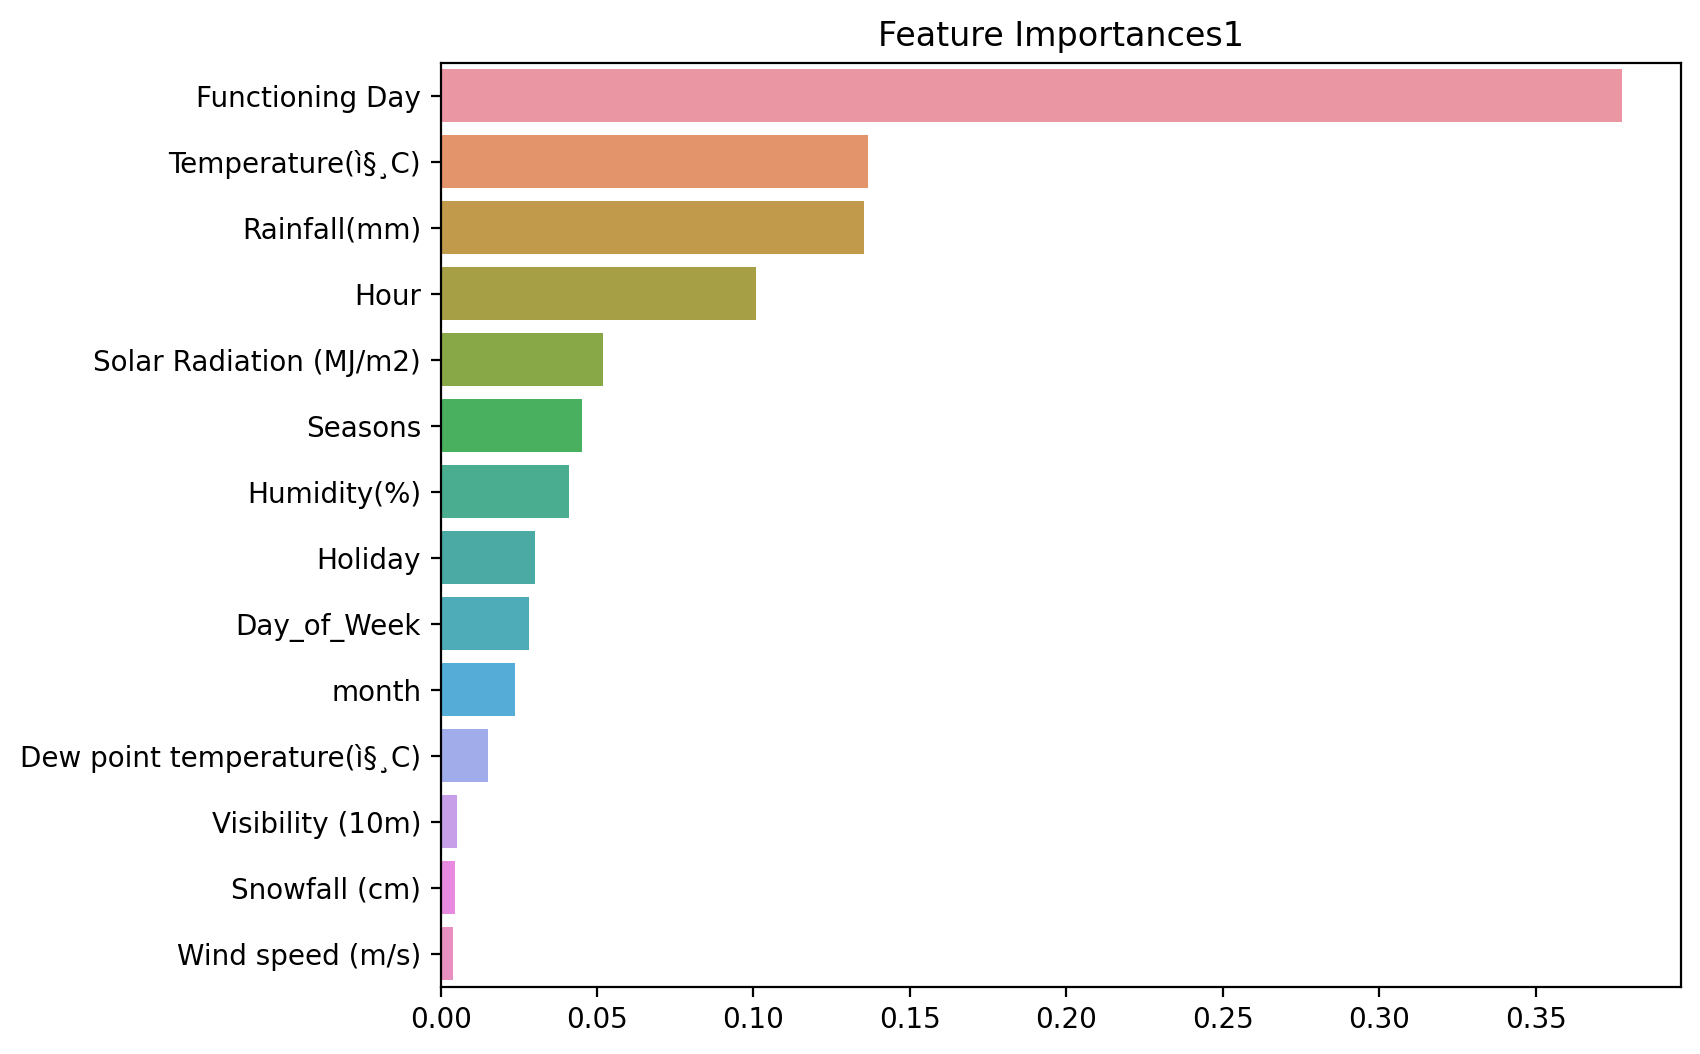

In [48]:
# 변수 중요도 계산

importances_values_2 = pd.Series(XGB_1.feature_importances_, index=X_val.columns).sort_values(ascending=False)

# 변수 중요도 시각화

plt.figure(figsize=(8,6))
plt.title('Feature Importances1')
sns.barplot(x=importances_values_2, y=importances_values_2.index)
plt.show()

## 최종모델로 Test 예측

In [49]:
df['Rented_bike'] = 0
df['Rented_bike'] = XGB_1.predict(test_last)

In [51]:
df

,Date,Hour,Temperature(ì§¸C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(ì§¸C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,Day_of_Week,Rented_bike
0,2018-11-01,0,5.7,62,2.3,1909,-1.0,0.0,0.0,0.0,0,0,1,11,4,529.104431
1,2018-11-01,1,5.1,65,1.6,1932,-0.9,0.0,0.0,0.0,0,0,1,11,4,415.462189
2,2018-11-01,2,4.4,64,1.0,2000,-1.8,0.0,0.0,0.0,0,0,1,11,4,342.191925
3,2018-11-01,3,4.2,65,0.7,1962,-1.8,0.0,0.0,0.0,0,0,1,11,4,194.667175
4,2018-11-01,4,3.6,70,0.8,1934,-1.3,0.0,0.0,0.0,0,0,1,11,4,136.505310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,2018-11-30,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,0,0,1,11,0,794.234863
716,2018-11-30,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,0,0,1,11,0,810.614624
717,2018-11-30,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,0,0,1,11,0,794.107178
718,2018-11-30,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,0,0,1,11,0,712.471802
